**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Add ```/path/to/your/folder``` to load the images

In [15]:
%cd /content/drive/MyDrive/Colab\ Notebooks/images/

cartoon = cv2.imread("cartoon.bmp")
cartoon_y = cv2.imread("cartoon_y.jpg")
girl = cv2.imread("girl.png") #grayscale image
girl_y = cv2.imread("girl_y.jpg")
fingerprint = cv2.imread("fingerprint.jpg")
fingerprint_y = cv2.imread("fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

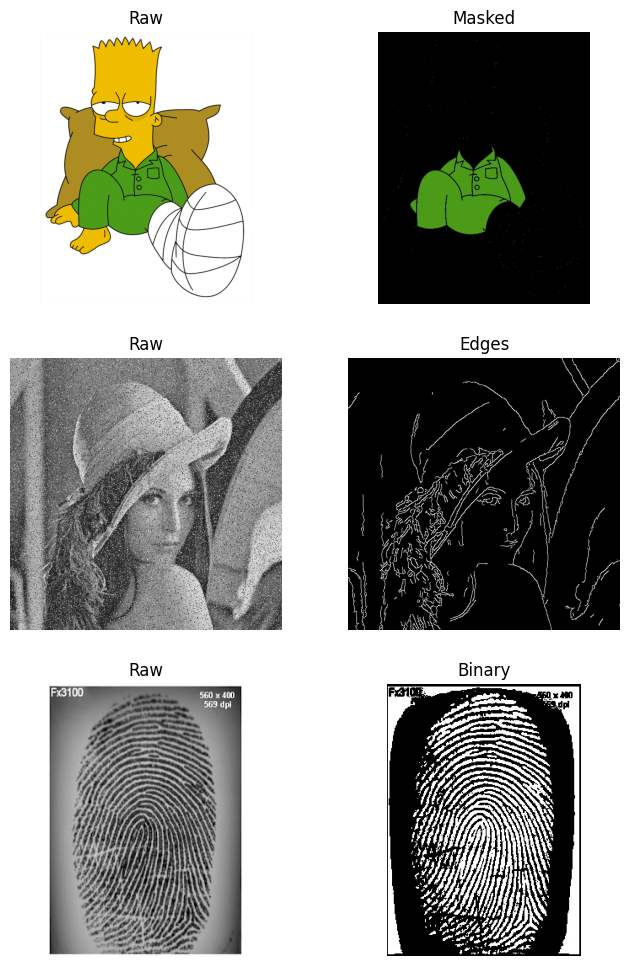

In [16]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [24]:
#START CODE HERE (Do all your processing here)

# Convert the image to HSV color space
cartoon_hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# range of green color in HSV
lower_green = np.array([35, 35, 35])
upper_green = np.array([80, 255, 255])

# Create a binary mask where green colors are white and the rest are black
mask = cv2.inRange(cartoon_hsv, lower_green, upper_green)

# Apply the mask to the original image
result = cv2.bitwise_and(cartoon, cartoon, mask=mask)

# Convert the original and result images from BGR to RGB for displaying with matplotlib
cartoon_y_mentee = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [66]:
#START CODE HERE (Do all your processing here)

# Convert the image to grayscale
gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise and smooth the image
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply Canny Edge Detector
girl_y_mentee = cv2.Canny(blurred, 50, 180)


# plt.imshow(girl_y_mentee)
#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [68]:
#START CODE HERE (Do all your processing here)

ret, fingerprint_y_mentee = cv2.threshold(fingerprint, 110, 255, cv2.THRESH_BINARY_INV)

#plt.imshow(fingerprint_y_mentee)
#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

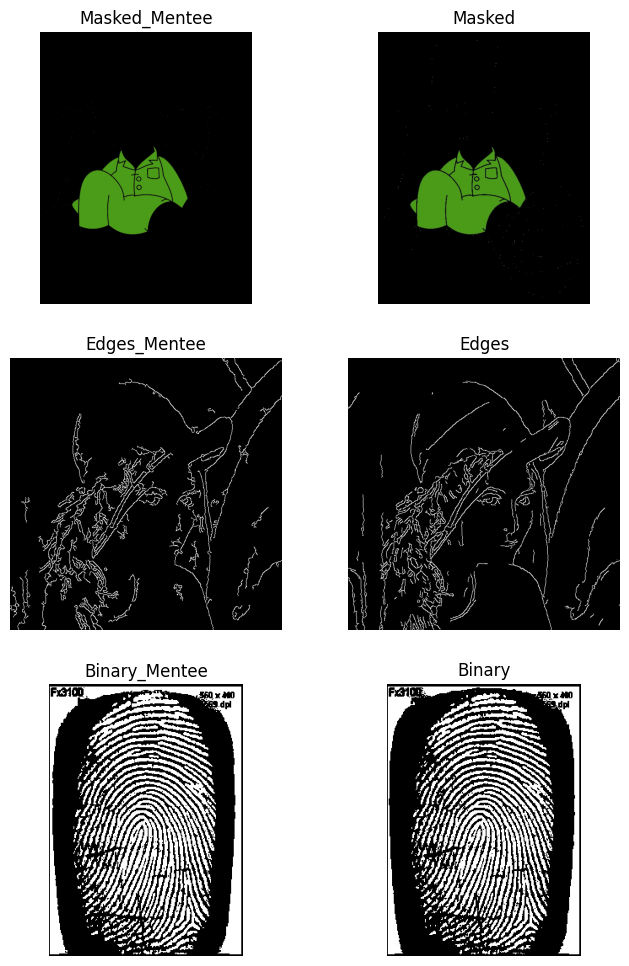

In [67]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()